In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sci
import seaborn as sns
import math
from scipy.optimize import curve_fit
from scipy.odr import ODR, Model, Data, RealData
import random

In [6]:
def gammaH2O(molality):
  limit = molality/(55.56+molality)
  x = np.linspace(0,limit,5)
  f = []
  for i in range(0,len(x)):
    a = -x[i]/(1-x[i])
    b = -4.338*x[i]**(-1/2)-373.811*x[i]**(1/2) + 1681.911*x[i] +0.45
    c = (1+9*x[i]**(1/2))**2
    fsol = a*(b/c)
    f.append(fsol)

  deltaX = limit/4
  soln = (deltaX/3)*(0+4*f[1]+2*f[2]+4*f[3]+f[4])
  gammaH2O = math.exp(soln)
  return gammaH2O
gammaH2O(1)

The activity coefficient of H2O is 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


1.0027480636877018

The activity coefficient of H2O is: 1.0028357447061889
The error term is: 8.744072580369943e-05


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


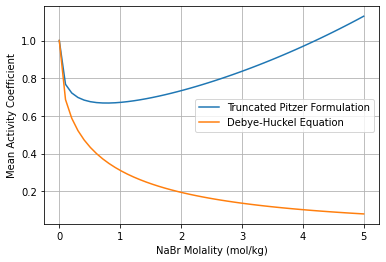

In [13]:
def integrand(x):
    a = -x/(1-x)
    b = -4.338*x**(-1/2)-373.811*x**(1/2) + 1681.911*x +0.45
    c = (1+9*x**(1/2))**2
    fsol = a*(b/c)
    return fsol

from scipy.integrate import quad
I = quad(integrand, 0, 0.01768)
actualGamma = math.exp(I[0])
calculatedGamma = gammaH2O(1)
print('The activity coefficient of H2O is:',actualGamma)
print('The error term is:', (actualGamma-calculatedGamma)/calculatedGamma)

def meanMolality(molality):
  x = molality/(55.56+molality)
  numerator = -8.776*x**(1/2) + 124.598*x**(3/2)
  denominator = 1+9*x**(1/2)
  frac = numerator/denominator
  gammaMean = math.exp(frac)

  solnDH = -8.776*math.sqrt(x)
  gammaMeanDH = math.exp(solnDH)
  return gammaMean, gammaMeanDH

molality = np.linspace(0,5,50)
gammaStore = []
gammaStoreDH = []
for i in range(0,len(molality)):
  gammaStore.append(meanMolality(molality[i])[0])
  gammaStoreDH.append(meanMolality(molality[i])[1])
plt.plot(molality,gammaStore,label ='Truncated Pitzer Formulation')
plt.plot(molality,gammaStoreDH,label ='Debye-Huckel Equation')
plt.grid()
plt.legend()
plt.xlabel('NaBr Molality (mol/kg)')
plt.ylabel('Mean Activity Coefficient')
plt.show()
